In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from datetime import datetime

%matplotlib inline 

In [2]:
# handlig dates
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')

In [3]:
# Import CSV from local 
vac_csv = f"C:/capes_sql/post_covid/vacunacio.csv"
vac_df = pd.read_csv(vac_csv, sep=',',parse_dates=['DATA'], date_parser=dateparse)
vac_df.head(2)

,SEXE_CODI,SEXE,REGIO_CODI,REGIO,SECTOR_CODI,SECTOR,AGA_CODI,AGA,ABS_CODI,ABS,EDAT,DOSI,DATA,FABRICANT,NO_VACUNAT,RECOMPTE
0,0.0,Home,7803.0,BARCELONA CIUTAT,7851.0,BARCELONA EIXAMPLE,70.0,Barcelona Dreta,28.0,BARCELONA 2-H,75 a 79,1,2021-03-24,Moderna / Lonza,NaN,2
1,1.0,Dona,7802.0,METROPOLITANA NORD,7867.0,BARCELONÈS NORD I MARESME,33.0,Maresme Central,154.0,MATARÓ 3,50 a 54,2,2021-04-22,BioNTech / Pfizer,NaN,1


In [4]:
# selection DOSI 1 
# Select rows with first dose
vac_first_dose = vac_df[vac_df.DOSI == 1]
#group by DATA and sum RECOMPTE
vac_first_dose_by_date = vac_first_dose.groupby(["DATA"])[["RECOMPTE"]].sum()

# selection DOSI 2
# Select rows with second dose
vac_second_dose = vac_df[vac_df.DOSI == 2]
#group by DATA and sum RECOMPTE
vac_second_dose_by_date = vac_second_dose.groupby(["DATA"])[["RECOMPTE"]].sum()

In [5]:
# Rename each column - appending “insitu”
vac_second_dose_by_date.rename(columns={"RECOMPTE": "REC_DOS"},
                      inplace=True)  # Modify the dataframe columns

vac_second_dose_by_date.tail()

,REC_DOS
DATA,
2021-07-27,24726
2021-07-28,34500
2021-07-29,36090
2021-07-30,34646
2021-07-31,16361


In [6]:
#remove index axis tag
vac_first_dose_by_date.index.name = None 
vac_second_dose_by_date.index.name = None

In [7]:
vac_first_dose_by_date.tail()

,RECOMPTE
2021-07-27,39105
2021-07-28,37545
2021-07-29,32427
2021-07-30,33223
2021-07-31,7935


In [8]:
# Joining on index 
df_vac_app =vac_first_dose_by_date.join(vac_second_dose_by_date, how="outer")
df_vac_app

,RECOMPTE,REC_DOS
2020-12-27,808,NaN
2020-12-28,31,NaN
2020-12-29,464,NaN
2020-12-30,2674,NaN
2020-12-31,2635,NaN
...,...,...
2021-07-27,39105,24726.0
2021-07-28,37545,34500.0
2021-07-29,32427,36090.0
2021-07-30,33223,34646.0


In [9]:
df_vac_app = df_vac_app.fillna(0) # fill the null values as 0

In [10]:
# cummulative sum second dose
df_vac_app["cumsum2"] = df_vac_app['REC_DOS'].cumsum()

# cummulative sum second dose
df_vac_app["cumsum"] = df_vac_app['RECOMPTE'].cumsum()

In [11]:
df_vac_app 

,RECOMPTE,REC_DOS,cumsum2,cumsum
2020-12-27,808,0.0,0.0,808
2020-12-28,31,0.0,0.0,839
2020-12-29,464,0.0,0.0,1303
2020-12-30,2674,0.0,0.0,3977
2020-12-31,2635,0.0,0.0,6612
...,...,...,...,...
2021-07-27,39105,24726.0,3937394.0,5042869
2021-07-28,37545,34500.0,3971894.0,5080414
2021-07-29,32427,36090.0,4007984.0,5112841
2021-07-30,33223,34646.0,4042630.0,5146064


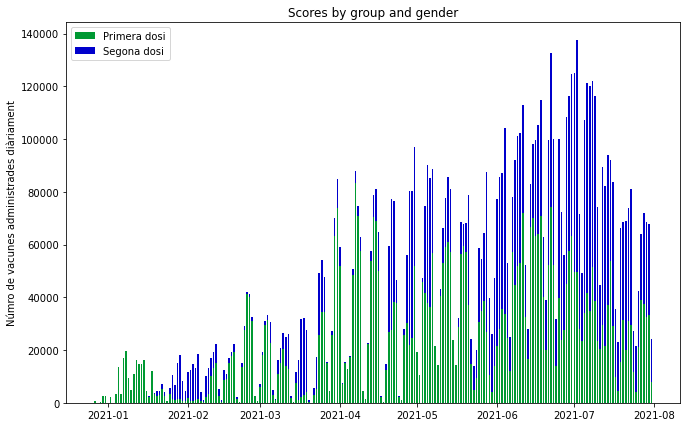

In [12]:
# Plot your data
fig, ax = plt.subplots(figsize=(11,7))

width_col = 0.6
labels = df_vac_app.index
    
ax.bar(labels, df_vac_app.RECOMPTE, width_col, label='Primera dosi', color='#009933') # first dose
ax.bar(labels, df_vac_app.REC_DOS, width_col, 
       bottom=df_vac_app["RECOMPTE"],
       label='Segona dosi', 
     color='#0000cc')


ax.set_ylabel('Númro de vacunes administrades diàriament')
ax.set_title('Scores by group and gender')
ax.legend()